In [1]:
import torch
import numpy as np

1 Draw Computation Graph and work out the gradient dz/da by following the path
back from z to a and compare the result with the analytical gradient.

```
x = 2*a + 3*b
y = 5*a*a + 3*b*b*b
z = 2*x + 3*y
```

In [2]:
a = torch.randn(1)
b = torch.randn(1, requires_grad=True)
print(f"a:{a}\nb:{b}")

x=2*a +3*b
y = 5*a*a + 3*b*b*b

z = 2*x + 3*y

a:tensor([2.1428])
b:tensor([-1.2920], requires_grad=True)


In [3]:
#torch gradient
z.backward()
#analytical gradient
def fp(a,b):
    return 4 + 30*a

In [4]:
print('Analytical f\'(x):', fp(a,b))
print('PyTorch\'s f\'(x):', a.grad)

Analytical f'(x): tensor([68.2840])
PyTorch's f'(x): None


2 For the following Computation Graph, work out the gradient da/dw by following the
path back from a to w and compare the result with the analytical gradient.
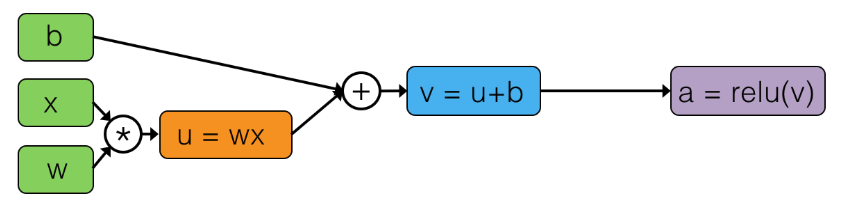

In [5]:
x = torch.randn(1)
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)


print(f"X:{x}\nW:{w}\nb:{b}")

X:tensor([0.5311])
W:tensor([-0.1248], requires_grad=True)
b:tensor([0.4459], requires_grad=True)


In [6]:
u = w * x
v = u + b
a = torch.relu(v)

In [7]:
#torch gradient
a.backward()
#analytical gradient
def vp(w,b,x):
    if w*x+b > 0:
        return x
    else:
        return 0

In [8]:
print('Analytical f\'(x):', vp(w,b,x))
print('PyTorch\'s f\'(x):', w.grad)

Analytical f'(x): tensor([0.5311])
PyTorch's f'(x): tensor([0.5311])


3 Repeat the Problem 2 using Sigmoid function

In [9]:
x = torch.randn(1)
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
print(f"X:{x}\nW:{w}\nb:{b}")

u = w * x
v = u + b
a = torch.sigmoid(v)

X:tensor([-0.3835])
W:tensor([-1.5378], requires_grad=True)
b:tensor([1.2804], requires_grad=True)


In [10]:
#torch gradient
a.backward()
#analytical gradient
def vp2(a,x):
    return a*(1-a)*x

In [11]:
print('Analytical f\'(x):', vp2(w,x))
print('PyTorch\'s f\'(x):', w.grad)

Analytical f'(x): tensor([1.4966], grad_fn=<MulBackward0>)
PyTorch's f'(x): tensor([-0.0444])


4 Verify that the gradients provided by PyTorch match with the analytical gradients of
the function 

```f= exp(-x2-2x-sin(x))``` w.r.t x

In [12]:
x = torch.randn(1,requires_grad=True)
print("X:",x)

X: tensor([-1.4671], requires_grad=True)


In [13]:
f = torch.exp( -x**2 - 2*x - torch.sin(x))

In [14]:
#torch gradient
f.backward()
#analytical gradient
def fp(x,f):
    return f * ( -2*x - 2 - torch.cos(x))

In [15]:
print('Analytical f\'(x):', fp(x,f))
print('PyTorch\'s f\'(x):', x.grad)

Analytical f'(x): tensor([4.9087], grad_fn=<MulBackward0>)
PyTorch's f'(x): tensor([4.9087])


5 Compute gradient for the function 
```y=8x4+ 3x3 +7x2+6x+3```
and verify the gradients provided by PyTorch with the analytical gradients. A snapshot of the Python code is
provided below.
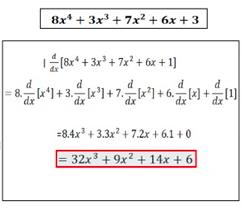

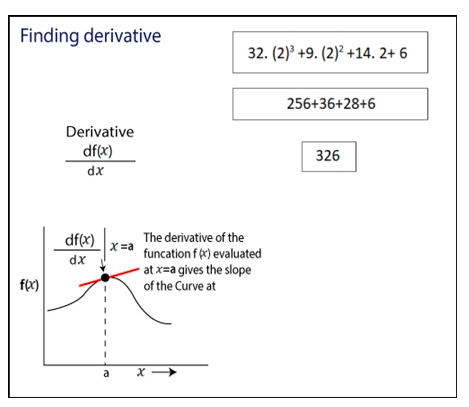

In [16]:
x=torch.tensor(2.0, requires_grad=True)
y=8*x**4+3*x**3+7*x**2+6*x+3
y.backward()
x.grad

tensor(326.)

6. For the following function, computation graph is provided below.
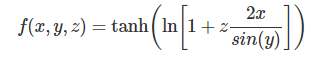
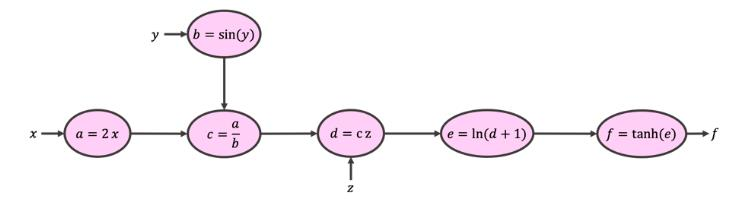
Calculate the intermediate variables a,b,c,d, and e in the forward pass. Starting from f,
calculate the gradient of each expression in the backward pass manually. Calculate ∂f/∂y
using the computational graph and chain rule. Use the chain rule to calculate gradient and
compare with analytical gradient.
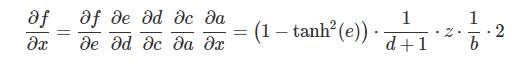

In [21]:
x = torch.tensor(1., requires_grad=True)
y = torch.tensor(2., requires_grad=True)
z = torch.tensor(3., requires_grad=True)


a = 2*x
b = torch.sin(y)
c = a/b
d = c*z
e = torch.log(d+1)
f = torch.tanh(e)

a = 2 * x
b = torch.sin(y)
c = a / b if b != 0 else torch.tensor(0.0, requires_grad=True)
d = c * z
e = torch.log(1 + d) if (1 + d) > 0 else torch.tensor(0.0, requires_grad=True)
f = torch.tanh(e)
f.backward(retain_graph=True)

# a.retain_grad()

In [22]:
def df_de():
    return (1-f*f)
def de_dd():
    return (1/(1+d)) if (1 + d) > 0 else torch.tensor(0.0, requires_grad=True)
def dd_dc():
    return z
def dc_da():
    return 1/b if b != 0 else torch.tensor(0.0, requires_grad=True)
def dc_db():
    return -(a/(b*b))
def da_dx():
    return 2
def db_dy():
    return torch.cos(y)

In [23]:
print(f"Intermediate Value\n a:{a}, b:{b}, c:{c}, d:{d}, e:{e}")

Intermediate Value
 a:2.0, b:0.9092974066734314, c:2.199500322341919, d:6.598501205444336, e:2.0279510021209717


In [28]:
# print(e.grad*d.grad*c.grad*b.grad*a.grad)

In [25]:
print(f"df/de: {df_de()}") 
print(f"de/dd: {de_dd()}") 
print(f"dd/dc: {dd_dc()}") 
print(f"dc/da: {dc_da()}") 
print(f"dc/db: {dc_db()}") 
print(f"da/dx: {da_dx()}")
print(f"db/dy: {db_dy()}")

df/de: 0.0669405460357666
de/dd: 0.1316048949956894
dd/dc: 3.0
dc/da: 1.0997501611709595
dc/db: -2.418900966644287
da/dx: 2
db/dy: -0.416146844625473


In [26]:
df_dy = df_de() * de_dd() * dd_dc() * dc_db() * db_dy() 

In [27]:
print('Analytical f\'(x):', df_dy)
print('PyTorch\'s f\'(x):', y.grad)

Analytical f'(x): tensor(0.0266, grad_fn=<MulBackward0>)
PyTorch's f'(x): tensor(0.0266)
